<a href="https://colab.research.google.com/github/NHleza/Week-3/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 84ms/step - accuracy: 0.7144 - loss: 0.9927 - val_accuracy: 0.8275 - val_loss: 0.5885
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 72ms/step - accuracy: 0.8380 - loss: 0.5857 - val_accuracy: 0.8704 - val_loss: 0.4967
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.8555 - loss: 0.5352 - val_accuracy: 0.8752 - val_loss: 0.4678
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.8585 - loss: 0.5210 - val_accuracy: 0.8788 - val_loss: 0.4608
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.8658 - loss: 0.5017 - val_accuracy: 0.8735 - val_loss: 0.4694
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 72ms/step - accuracy: 0.8663 - loss: 0.4947 - val_accuracy: 0.8747 - val_loss: 0.4588
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.8705 - loss: 0.4871 - val_accuracy: 0.8813 - val_loss: 0.4482
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 32s 69ms/step - accuracy: 0.8726 - loss: 0.4794 - val_accurac

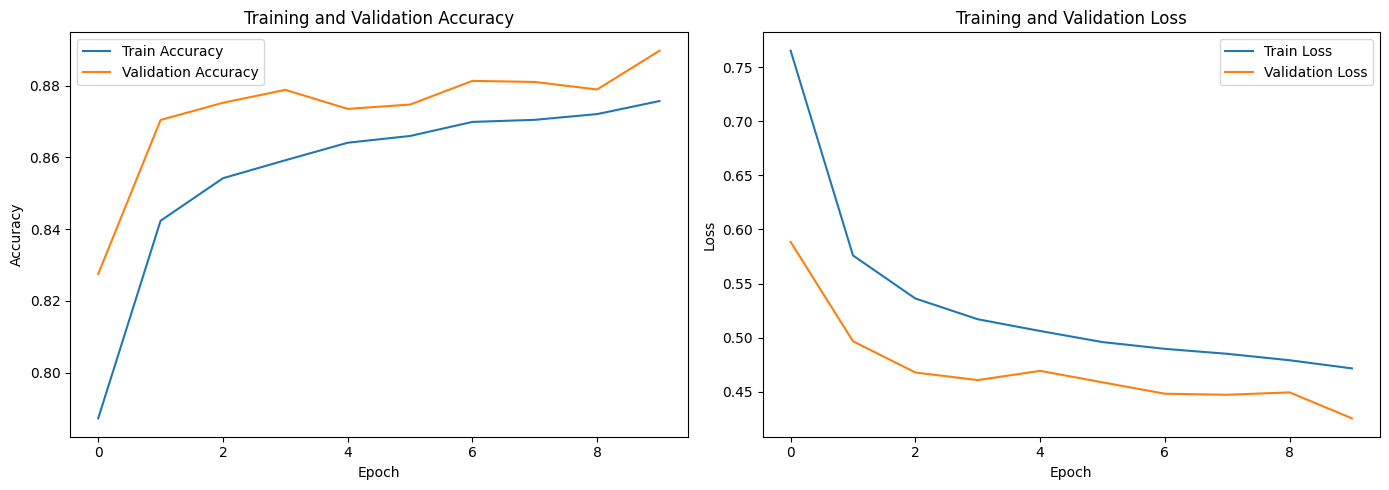

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       1.00      0.97      0.98      1000
    Pullover       0.79      0.87      0.83      1000
       Dress       0.85      0.93      0.89      1000
        Coat       0.82      0.80      0.81      1000
      Sandal       0.98      0.97      0.98      1000
       Shirt       0.78      0.59      0.67      1000
     Sneaker       0.93      0.96      0.95      1000
         Bag       0.96      0.98      0.97      1000
  Ankle boot       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



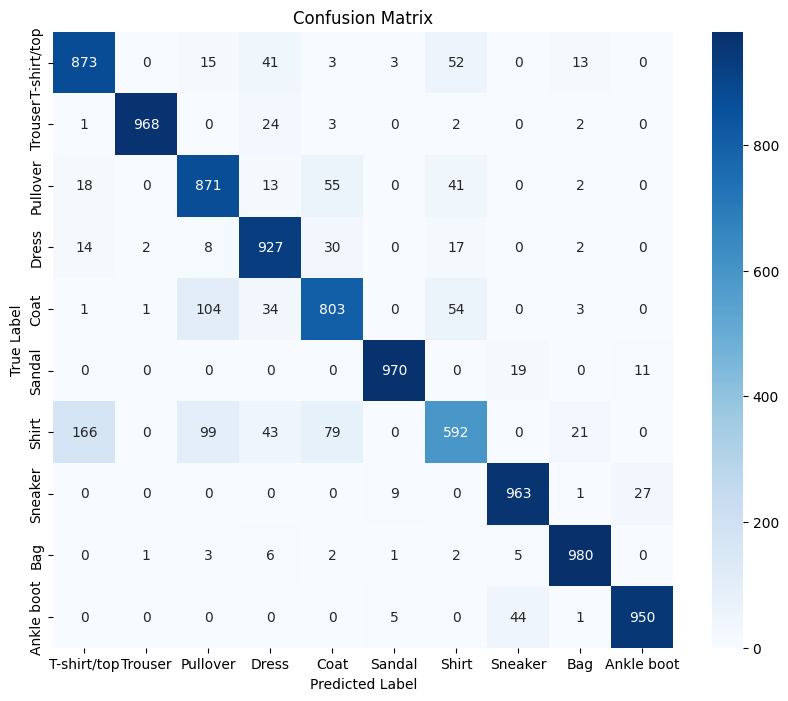

Named Entities in the text:
Apple - ORG
U.K. - GPE
$1 billion - MONEY
Elon Musk - PERSON
2002 - DATE
Tesla - ORG
2003 - DATE


'\nEthical Reflection:\n\n- Bias & Fairness: Fashion MNIST is a balanced dataset, but real-world datasets may have biases that must be identified and mitigated.\n- Privacy: No personal or sensitive data is used here. For real applications, ensure data privacy and consent.\n- Transparency: Model architecture, hyperparameters, and training details are documented for reproducibility.\n- Optimization: Regularization (dropout, L2) was applied to prevent overfitting. Further hyperparameter tuning can improve performance.\n- Responsible Use: AI outputs, especially in sensitive domains, should be validated by domain experts before deployment.\n'

In [2]:
# AI Tools Assignment: Mastering the AI Toolkit 🛠️🧠
# Members: [Hleza Nqobile]

# ===========================
# PART 1: Image Classification with TensorFlow (Fashion MNIST)
# ===========================

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load Fashion MNIST dataset from TensorFlow Datasets
(ds_train, ds_test), ds_info = tfds.load(
    'fashion_mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Normalize images: uint8 [0,255] -> float32 [0.0,1.0]
def normalize_img(image, label):
    return tf.cast(image, tf.float32) / 255., label

# Prepare training and test datasets
ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.cache().shuffle(ds_info.splits['train'].num_examples).batch(128).prefetch(tf.data.AUTOTUNE)

ds_test = ds_test.map(normalize_img, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.batch(128).cache().prefetch(tf.data.AUTOTUNE)

# Build a simple CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),  # Regularization
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model for 10 epochs
history = model.fit(ds_train, epochs=10, validation_data=ds_test)

# Plot training and validation accuracy and loss
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.savefig("fashion_mnist_training_plot.png")  # Save for report
plt.show()

# Evaluate model on test dataset
test_images = []
test_labels = []
for images, labels in tfds.as_numpy(ds_test):
    test_images.append(images)
    test_labels.append(labels)
test_images = np.vstack(test_images)
test_labels = np.hstack(test_labels)

predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)

print("Classification Report:\n")
print(classification_report(test_labels, pred_labels, target_names=ds_info.features['label'].names))

# Confusion matrix heatmap
cm = confusion_matrix(test_labels, pred_labels)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=ds_info.features['label'].names, yticklabels=ds_info.features['label'].names, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("fashion_mnist_confusion_matrix.png")  # Save for report
plt.show()

# ===========================
# PART 2: Named Entity Recognition (NER) with spaCy
# ===========================

import spacy
from spacy import displacy

# Load pre-trained English model
nlp = spacy.load("en_core_web_sm")

# Real-world example text for NER
text = (
    "Apple is looking at buying U.K. startup for $1 billion. "
    "Elon Musk founded SpaceX in 2002 and Tesla in 2003."
)

doc = nlp(text)

print("Named Entities in the text:")
for ent in doc.ents:
    print(f"{ent.text} - {ent.label_}")

# Render and save NER visualization as SVG
svg = displacy.render(doc, style="ent", jupyter=False)
with open("ner_visualization.svg", "w", encoding="utf-8") as f:
    f.write(svg)

# ===========================
# PART 3: Ethical Reflection (to include in your report)
# ===========================

"""
Ethical Reflection:

- Bias & Fairness: Fashion MNIST is a balanced dataset, but real-world datasets may have biases that must be identified and mitigated.
- Privacy: No personal or sensitive data is used here. For real applications, ensure data privacy and consent.
- Transparency: Model architecture, hyperparameters, and training details are documented for reproducibility.
- Optimization: Regularization (dropout, L2) was applied to prevent overfitting. Further hyperparameter tuning can improve performance.
- Responsible Use: AI outputs, especially in sensitive domains, should be validated by domain experts before deployment.
"""

# ===========================
# END OF NOTEBOOK
# ===========================


